# Tutorial No. 2

## 1. Import Packages

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import numpy as np

# Deal with Over-Fitting
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Augmentaion
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## 2. Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Remove images to get smaller dataset
x_train = x_train[:1000,:,:]
y_train = y_train[:1000]
x_test = x_test[:500,:,:]
y_test = y_test[:500]

# Change the shape to (n_clss)x(Height)x(Weight)x(channels)
x_train = np.expand_dims(x_train, axis=3)
x_test =  np.expand_dims(x_test, axis=3)

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1000, 28, 28, 1)
x_test shape: (500, 28, 28, 1)
y_train shape: (1000, 10)
y_test shape: (500, 10)


## 3. Define Parameters 

In [3]:
num_of_clss = 10        # number of classes
lr = 1e-4               # learning rate 
beta_1 = 0.9            # beta 1 - for adam optimizer
beta_2 = 0.95           # beta 2 - for adam optimizer
epsilon = 1e-7          # epsilon - for adam optimizer
epochs = 50              # number of epochs 
bs = 32                 # batch size
dp = 0.5                # dropout probability


## 4. Build CNN Model

In [4]:
inp = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# First conv block
x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inp)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Second conv block
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(dp)(x)

# Third conv block
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# FC layers
x = Flatten()(x)
x = Dense(15, activation = 'sigmoid')(x)
x = BatchNormalization()(x)
x = Dropout(dp)(x)
out = Dense(num_of_clss, activation = 'softmax')(x)

model = Model(inp,out)














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 5. Apply Augmentation

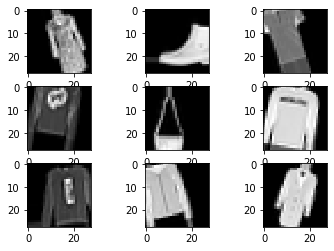

In [5]:
# Define wanted augmentation
datagen = ImageDataGenerator(
    validation_split=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit on our train set
datagen.fit(x_train)

# Visualize the augmentation
# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break


##  6. Compile the Model

In [6]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# add early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


## 7. Train the Model

In [10]:
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(x_train, y_train, batch_size=bs)
val_generator = datagen.flow(x_train, y_train, batch_size=bs, subset='validation')

history = model.fit_generator(train_generator, steps_per_epoch=len((x_train)/bs)*2, epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=len((x_train)/bs)*2,
                              callbacks=[monitor],
                              verbose=1)


Epoch 1/50
2000/2000 [==============================] - 48s 24ms/step - loss: 0.4720 - acc: 0.8411 - val_loss: 0.2694 - val_acc: 0.9075
Epoch 2/50
2000/2000 [==============================] - 43s 22ms/step - loss: 0.4569 - acc: 0.8466 - val_loss: 0.2438 - val_acc: 0.9134
Epoch 3/50
2000/2000 [==============================] - 45s 23ms/step - loss: 0.4523 - acc: 0.8476 - val_loss: 0.2591 - val_acc: 0.9099
Epoch 4/50
2000/2000 [==============================] - 43s 22ms/step - loss: 0.4475 - acc: 0.8488 - val_loss: 0.2365 - val_acc: 0.9183
Epoch 5/50
2000/2000 [==============================] - 41s 20ms/step - loss: 0.4368 - acc: 0.8533 - val_loss: 0.2413 - val_acc: 0.9172
Epoch 6/50
2000/2000 [==============================] - 44s 22ms/step - loss: 0.4273 - acc: 0.8573 - val_loss: 0.2189 - val_acc: 0.9222
Epoch 7/50
2000/2000 [==============================] - 43s 21ms/step - loss: 0.4204 - acc: 0.8595 - val_loss: 0.2091 - val_acc: 0.9285
Epoch 8/50
2000/2000 [==========================

## 8. Visualize

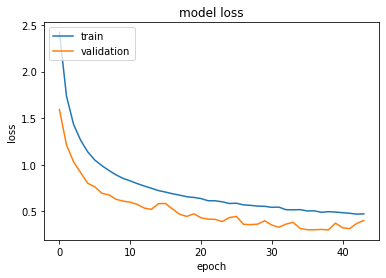

In [8]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 9. Model Evaluation

500/500 [==============================] - 0s 224us/step
test loss: 0.6906366128921508
test accuracy: 0.7920000009536743
Normalized confusion matrix
[[ 89.09090909   0.           7.27272727   0.           0.
    0.           3.63636364   0.           0.           0.        ]
 [  0.         100.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  3.07692308   0.          76.92307692   0.           0.
    0.          20.           0.           0.           0.        ]
 [  4.34782609   2.17391304   0.          86.95652174   0.
    0.           6.52173913   0.           0.           0.        ]
 [  8.77192982   0.          40.35087719   5.26315789  24.56140351
    0.          21.05263158   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   97.43589744   0.           2.56410256   0.           0.        ]
 [ 25.53191489   0.          19.14893617   2.12765957   0.
    0.          53.191

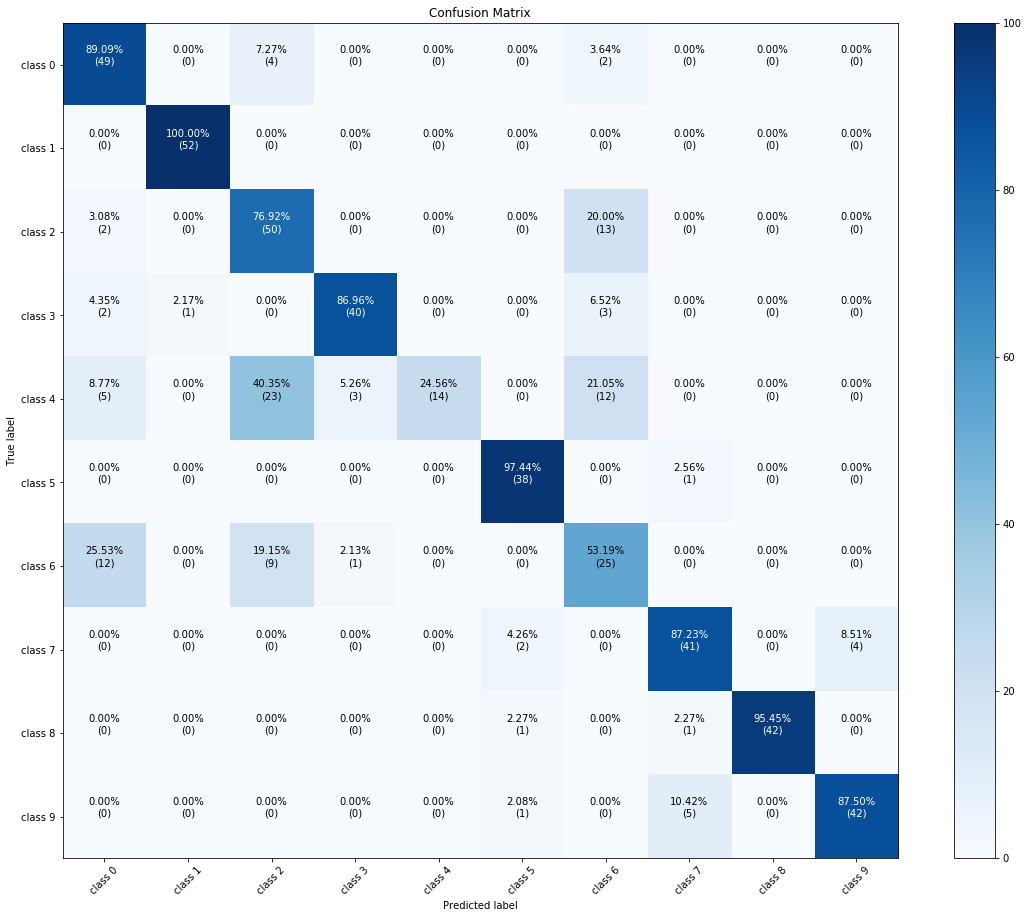

In [9]:
y_pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)
